<a href="https://colab.research.google.com/github/swastikbanerjee/DL_Lab/blob/main/dlLab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential,  Model
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from keras.layers import Dense, LSTM, Dropout, SimpleRNN, Embedding, Input
import os
import string
from string import digits
import re
from sklearn.utils import shuffle

# **Implement the Weather Prediction using LSTM and RNN**

In [ ]:
data = pd.read_csv("/content/seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
data.describe(include='all')

,date,precipitation,temp_max,temp_min,wind,weather
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461
unique,1461,NaN,NaN,NaN,NaN,5
top,2012-01-01,NaN,NaN,NaN,NaN,rain
freq,1,NaN,NaN,NaN,NaN,641
mean,NaN,3.029432,16.439083,8.234771,3.241136,NaN
std,NaN,6.680194,7.349758,5.023004,1.437825,NaN
min,NaN,0.000000,-1.600000,-7.100000,0.400000,NaN
25%,NaN,0.000000,10.600000,4.400000,2.200000,NaN
50%,NaN,0.000000,15.600000,8.300000,3.000000,NaN
75%,NaN,2.800000,22.200000,12.200000,4.000000,NaN


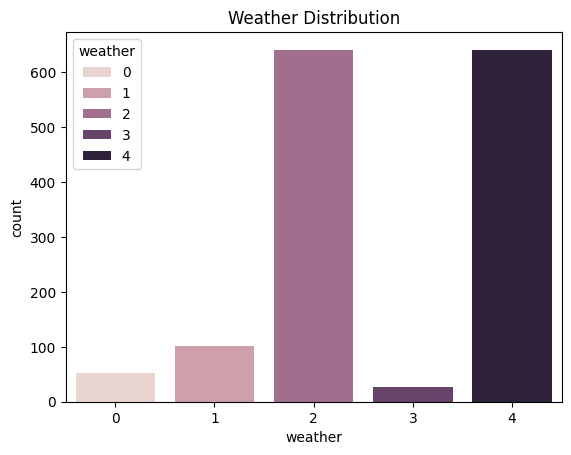

In [ ]:
sns.countplot(x='weather',data=data,hue=data['weather'])
plt.title(("Weather Distribution"))
plt.show()

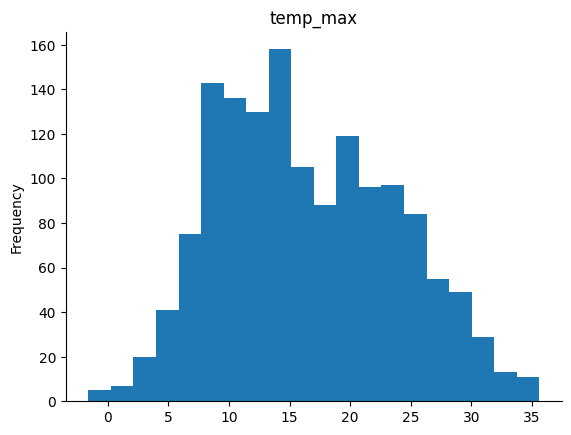

In [ ]:
data['temp_max'].plot(kind='hist', bins=20, title='temp_max')
plt.gca().spines[['top', 'right',]].set_visible(False)

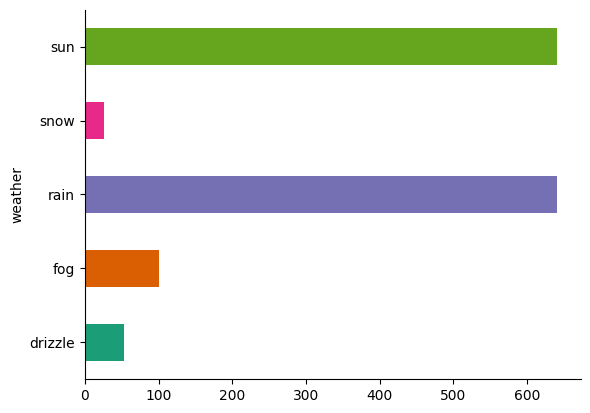

In [ ]:
data.groupby('weather').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-7-b6c36734f836>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='wind', y='weather', inner='box', palette='Dark2')


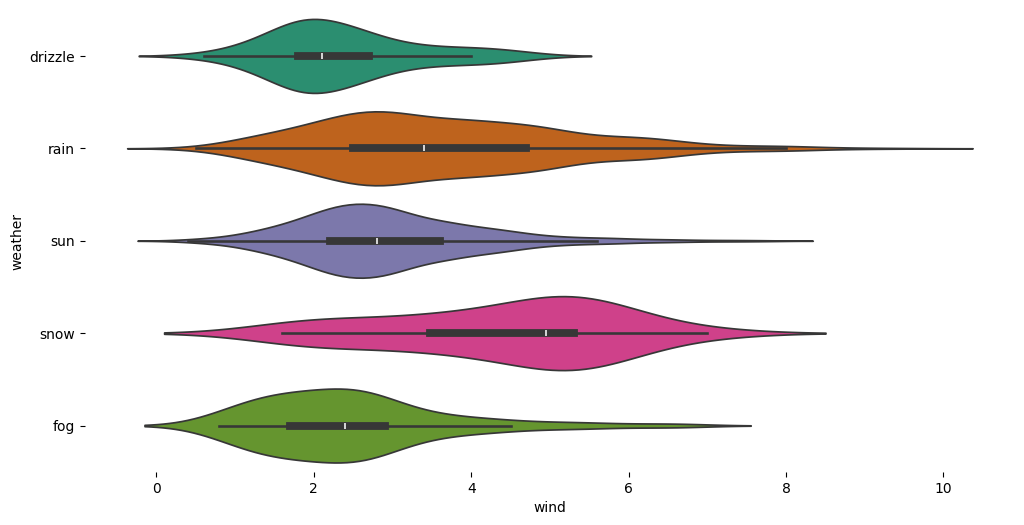

In [ ]:
figsize = (12, 1.2 * len(data['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='wind', y='weather', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
lb = LabelEncoder()
data['weather'] = lb.fit_transform(data['weather'])
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2


In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
# Scaling the numerical variables

scaler = MinMaxScaler()
data[['precipitation', 'temp_max', 'temp_min', 'wind']] = scaler.fit_transform(data[['precipitation', 'temp_max', 'temp_min', 'wind']])

In [ ]:
X = data.drop(columns = ['date','weather'])
y = data['weather']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Reshaping input data for RNN
X_train = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
X_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Ensure the sizes of features and labels match
y_train = y_train[:X_train.shape[0]]

**Recurrent Neural Networks**

---



In [ ]:
model = Sequential()
model.add(SimpleRNN(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

print(model.summary)

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7b98cb455bd0>>


In [ ]:
# Compiling the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Fitting the Model
train_history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
37/37 [==============================] - 2s 5ms/step - loss: 0.6128 - accuracy: 0.7971
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 0.6191 - accuracy: 0.7937
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 0.5842 - accuracy: 0.8065
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 0.5890 - accuracy: 0.8039
Epoch 5/100
37/37 [==============================] - 0s 6ms/step - loss: 0.6007 - accuracy: 0.8005
Epoch 6/100
37/37 [==============================] - 0s 8ms/step - loss: 0.5821 - accuracy: 0.8039
Epoch 7/100
37/37 [==============================] - 0s 10ms/step - loss: 0.5807 - accuracy: 0.8099
Epoch 8/100
37/37 [==============================] - 0s 9ms/step - loss: 0.5847 - accuracy: 0.8091
Epoch 9/100
37/37 [==============================] - 0s 9ms/step - loss: 0.5975 - accuracy: 0.8014
Epoch 10/100
37/37 [==============================] - 0s 5ms/step - loss: 0.5825 - accuracy: 0.8031
Epoch 11

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

10/10 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.8430
Test Loss: 0.4661914110183716, Test Accuracy: 0.8430033922195435


In [ ]:
# Prediction

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

10/10 [==============================] - 0s 2ms/step


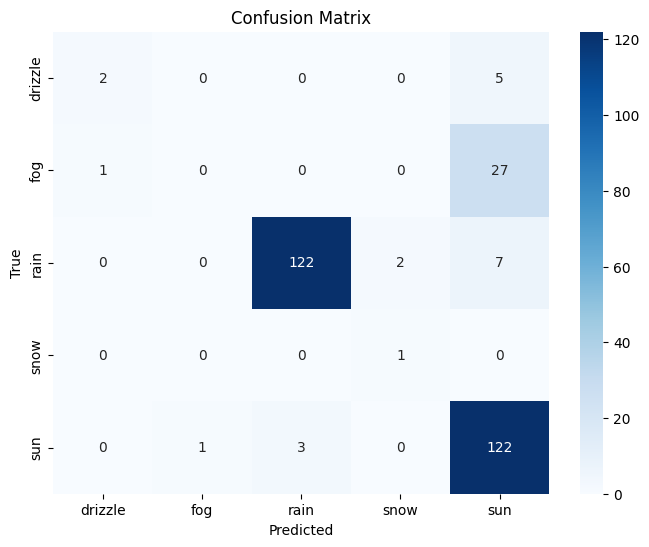

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Long Short Term-Memory**

---



In [ ]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

In [ ]:
x_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)
# Reshaping input data for RNN
X_train = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
X_val = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model1 = Sequential()

model1.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
model1.add(Dropout(0.2))
model1.add(LSTM(units=50, return_sequences = True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=50, return_sequences = True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=50))
model1.add(Dropout(0.2))
model1.add(Dense(units=5))

print(model1.summary)

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7b98b720a620>>


In [ ]:
# Compiling the Model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Fitting the Model
train_history = model1.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
24/24 [==============================] - 8s 11ms/step - loss: 3.0331 - accuracy: 0.4222
Epoch 2/100
24/24 [==============================] - 0s 11ms/step - loss: 2.2717 - accuracy: 0.4418
Epoch 3/100
24/24 [==============================] - 0s 11ms/step - loss: 2.2632 - accuracy: 0.4431
Epoch 4/100
24/24 [==============================] - 0s 11ms/step - loss: 2.2445 - accuracy: 0.4340
Epoch 5/100
24/24 [==============================] - 0s 11ms/step - loss: 2.2170 - accuracy: 0.4497
Epoch 6/100
24/24 [==============================] - 0s 11ms/step - loss: 2.1919 - accuracy: 0.4340
Epoch 7/100
24/24 [==============================] - 0s 10ms/step - loss: 2.1406 - accuracy: 0.4431
Epoch 8/100
24/24 [==============================] - 0s 10ms/step - loss: 2.1895 - accuracy: 0.4366
Epoch 9/100
24/24 [==============================] - 0s 11ms/step - loss: 2.1414 - accuracy: 0.4497
Epoch 10/100
24/24 [==============================] - 0s 12ms/step - loss: 2.1532 - accuracy: 0.4444

In [ ]:
loss, accuracy = model1.evaluate(x_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

10/10 [==============================] - 2s 7ms/step - loss: 1.0902 - accuracy: 0.4437
Test Loss: 1.0901601314544678, Test Accuracy: 0.44368600845336914


In [ ]:
# Prediction

y_pred_probs = model1.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

10/10 [==============================] - 2s 4ms/step


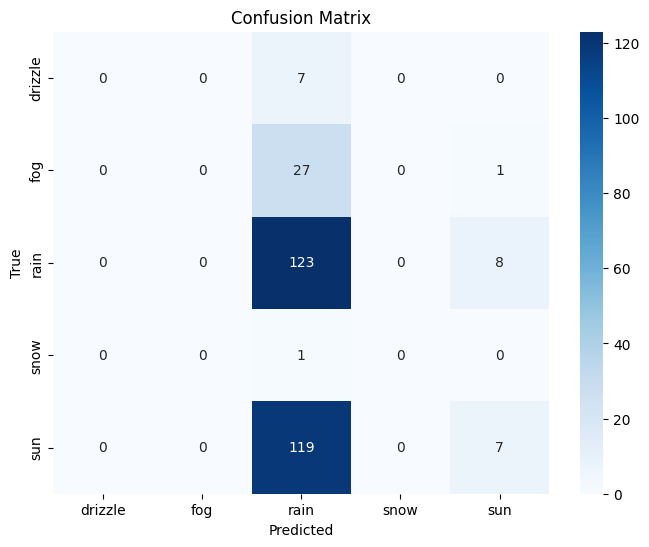

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()